# Internet Access

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->

The problem I want to address is the digital divide in internet access. Although the internet is essential for education, jobs, and daily life, many households and schools especially in rural or low-income areas that still lack reliable and affordable access. This gap limits learning opportunities, reduces economic mobility, and widens social inequality. My project will analyze patterns of internet access across countries and income groups to better understand where the disparities are greatest.

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->

What I want to answer is how does unequal access to the internet impact educational opportunity across countries and income groups? By looking at both household internet usage and school connectivity, I aim to uncover whether limited access reinforces broader social and economic inequalities, and where progress is or isn’t being made

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->

My hypothesized answer is that countries with lower income levels and rural regions will show significantly lower rates of internet access in both households and schools, which in turn will correlate with weaker educational outcomes. I expect to see a clear divide between high-income and low-income countries, with middle-income countries showing uneven progress.

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->

Share of primary schools with access to the Internet for teaching
https://ourworldindata.org/grapher/primary-schools-with-access-to-internet

FCC National Broadband Map 
https://broadbandmap.fcc.gov/home

Individuals using the Internet (% of population)
https://data.worldbank.org/indicator/IT.NET.USER.ZS

## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

I will combine household internet usage data with school-level internet access data to compare connectivity trends across countries, regions, and income levels. Using country codes, I can merge these datasets and create visualizations such as line charts, bar charts, and maps. This will highlight disparities in internet access and show how the digital divide impacts education globally.

In [3]:
# Start your code here
# Data Analysis and Visualization Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os


# Load CSV files from the DataSets folder
broadband_municipality_df = pd.read_csv("DataSets/Broadband_Availability_By_Municipality.csv")
broadband_zip_df = pd.read_csv("DataSets/Broadband_Adoption_and_Infrastructure_by_Zip_Code.csv")
schools_df = pd.read_csv("DataSets/primary-schools-with-access-to-internet.csv")

# Display information about each dataset
print("✅ Broadband Availability by Municipality:")
print(broadband_municipality_df.info(), "\n")

print("✅ Broadband Adoption & Infrastructure by ZIP Code:")
print(broadband_zip_df.info(), "\n")

print("✅ Primary Schools with Internet Access:")
print(schools_df.info())

✅ Broadband Availability by Municipality:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1635 entries, 0 to 1634
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   GNIS ID                  1635 non-null   int64  
 1   Municipality Name        1635 non-null   object 
 2   Municipality Type        1635 non-null   object 
 3   2010 Muni Population     1635 non-null   int64  
 4   2010 Muni Housing Units  1635 non-null   int64  
 5   Muni Area (sq mi)        1635 non-null   float64
 6   County                   1634 non-null   object 
 7   REDC Region              1634 non-null   object 
 8   # Cable Providers        1635 non-null   int64  
 9   # Hse Units Cable        1635 non-null   int64  
 10  % Hse Units Cable        1635 non-null   int64  
 11  # of DSL Providers       1635 non-null   int64  
 12  # Hse Units DSL          1635 non-null   int64  
 13  % Hse Units DSL          1635 non-nu

## Visualizations
Distribution of Wireline Broadband Availability by Municipality

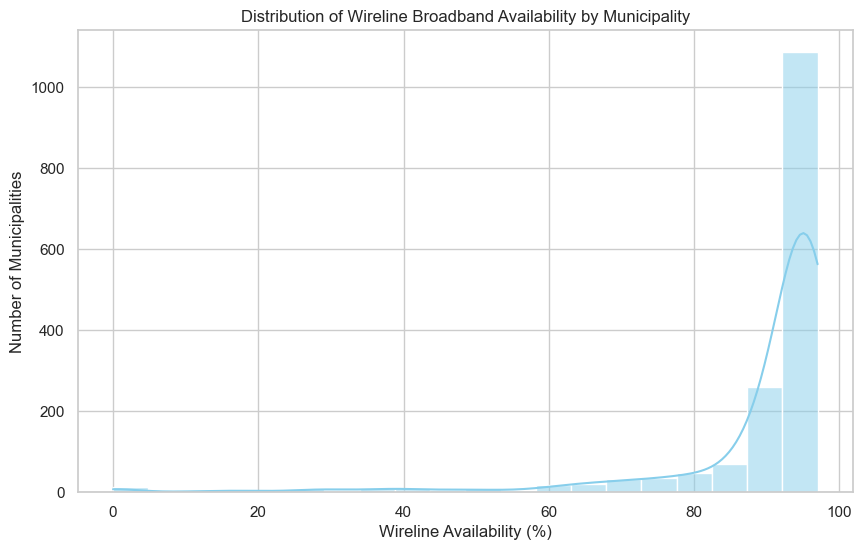

In [17]:
broadband_municipality_df = pd.read_csv("DataSets/Broadband_Availability_By_Municipality.csv")

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(
    broadband_municipality_df['% Hse Units Wireline'],
    bins=20, kde=True, color='skyblue'
)
plt.title("Distribution of Wireline Broadband Availability by Municipality")
plt.xlabel("Wireline Availability (%)")
plt.ylabel("Number of Municipalities")
plt.show()




Home Broadband Adoption vs No Internet Access by ZIP Code

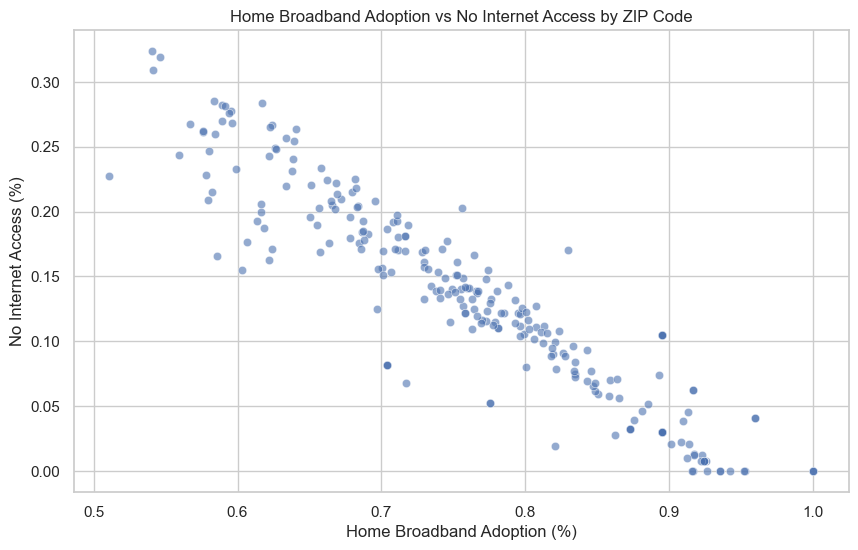

In [12]:
broadband_zip_df = pd.read_csv("DataSets/Broadband_Adoption_and_Infrastructure_by_Zip_Code.csv")

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=broadband_zip_df,
    x='Home Broadband Adoption (Percentage of  Households)',
    y='No Internet Access (Percentage of Households)',
    alpha=0.6
)
plt.title("Home Broadband Adoption vs No Internet Access by ZIP Code")
plt.xlabel("Home Broadband Adoption (%)")
plt.ylabel("No Internet Access (%)")
plt.show()


Top 10 Municipalities by Fiber Broadband Availability

C:\Users\natha\AppData\Local\Temp\ipykernel_19736\3714280581.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


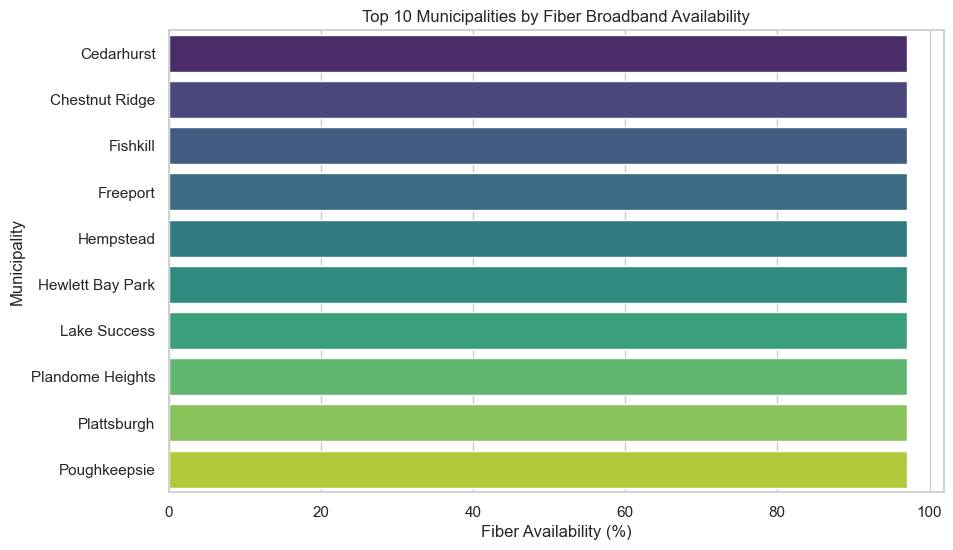

In [13]:
broadband_municipality_df = pd.read_csv("DataSets/Broadband_Availability_By_Municipality.csv")

top_fiber = broadband_municipality_df.nlargest(10, '% Hse Units Fiber')

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_fiber,
    x='% Hse Units Fiber',
    y='Municipality Name',
    palette='viridis'
)
plt.title("Top 10 Municipalities by Fiber Broadband Availability")
plt.xlabel("Fiber Availability (%)")
plt.ylabel("Municipality")
plt.show()


Average Internet Access in Primary Schools Over Time

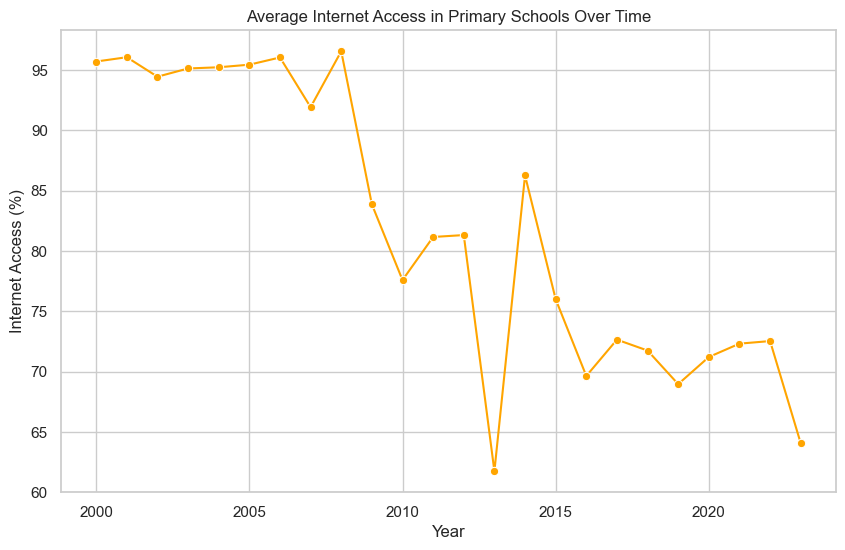

In [14]:
schools_df = pd.read_csv("DataSets/primary-schools-with-access-to-internet.csv")

# Rename long column for convenience
schools_df = schools_df.rename(columns={
    "4.a.1 - Proportion of schools with access to the internet for pedagogical purposes, by education level (%) - SE_ACS_INTNT - Primary": 
    "Internet Access (%)"
})

sns.set(style="whitegrid")

# Plot average access by year across all entities
yearly_access = schools_df.groupby("Year")["Internet Access (%)"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_access, x="Year", y="Internet Access (%)", marker="o", color="orange")
plt.title("Average Internet Access in Primary Schools Over Time")
plt.xlabel("Year")
plt.ylabel("Internet Access (%)")
plt.grid(True)
plt.show()


## Data Cleaning and Transformation 
Missing Values:
Missing percentage values in the broadband and adoption datasets were replaced with the mean of their respective columns, while rows with missing critical values in the schools dataset were removed to preserve data integrity.

Duplicate Values:
Duplicate records were identified and removed across all three datasets to prevent redundancy and ensure accuracy in later analysis.

Outliers:
Extreme outliers in broadband percentage columns were detected using the interquartile range (IQR) method and removed to reduce distortion in statistical and visual analyses.

Data Type Transformation:
All percentage-based columns were converted to numeric types to allow accurate aggregation and visualization, while categorical fields were standardized as strings for consistency.

## Prior Feedback and Updates
Unfortunately I did not have any feedback to work with to push changes to origin on my prior work, but hopefully with feedbck from checkpoint 2 I will be able to improve my project.

## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->
https://ourworldindata.org/grapher/primary-schools-with-access-to-internet

https://broadbandmap.fcc.gov/home

https://data.worldbank.org/indicator/IT.NET.USER.ZS

In [11]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: kernel kernelspec migrate run troubleshoot

Jupyter command `jupyter-nbconvert` not found.
